# Virat Kohli's Data

In [1]:
#This is for Virat kohli's data
# Importing Libraries
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
cricket_data= pd.read_csv("all_matches.csv")

C:\Users\gogat\AppData\Local\Temp\ipykernel_13248\4006547997.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cricket_data= pd.read_csv("all_matches.csv")


In [3]:
cricket_data.tail(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
200659,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.2,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200660,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.3,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200661,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.4,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200662,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.5,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200663,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.6,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cricket_data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [5]:
#Filtering rows where Virat Kohli is the striker
kohli_batting_data = cricket_data[cricket_data['striker'] == 'V Kohli']

#Calculating the number of balls faced and runs scored by Virat Kohli
kohli_batting_stats = kohli_batting_data.groupby(['start_date', 'match_id', 'venue', 'innings','bowling_team']).agg({
    'ball': 'count',
    'runs_off_bat': 'sum',
}).reset_index()

#Calculating boundaries (4s and 6s), half-centuries, and centuries
kohli_batting_data['boundary_count'] = kohli_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
kohli_batting_data['sixer_count'] = kohli_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)
boundaries_sixes_data = kohli_batting_data.groupby(['start_date', 'match_id', 'venue', 'innings','bowling_team']).agg({
    'boundary_count': 'sum',
    'sixer_count': 'sum'
}).reset_index()

kohli_batting_stats = kohli_batting_stats.merge(boundaries_sixes_data, on=['start_date', 'match_id', 'venue', 'innings','bowling_team'], how='left')

#Calculating half-centuries and centuries
kohli_batting_stats['half_century_count'] = (kohli_batting_stats['runs_off_bat'] >= 50).astype(int)
kohli_batting_stats['century_count'] = (kohli_batting_stats['runs_off_bat'] >= 100).astype(int)

#Calculating the strike rate
kohli_batting_stats['strike_rate'] = (kohli_batting_stats['runs_off_bat'] / kohli_batting_stats['ball']) * 100

#Computing the Fantasy Point for V Kohli
def calculate_fantasy_points(row):
    points = 0
    
    #Points for runs
    points += row['runs_off_bat']
    
    #Points for boundaries and sixers
    points += row['boundary_count']  # 1 point for each boundary
    points += 2 * row['sixer_count']  # 2 points for each sixer
    
    #Bonus points for half-century and century
    if row['runs_off_bat'] >= 50:
        points += 8
    if row['runs_off_bat'] >= 100:
        points += 16
    
    #Deductions for low strike rate (only if batsman has faced at least 10 balls)
    if row['ball'] >= 10:
        if 60 <= row['strike_rate'] <= 70:
            points -= 2
        elif row['strike_rate'] < 60:
            points -= 4
    
    return points

#Calculating fantasy points for each row in the dataset
kohli_batting_stats['fantasy_points'] = kohli_batting_stats.apply(calculate_fantasy_points, axis=1)

#Displaying the dataset with the new 'fantasy_points' column
kohli_batting_stats


C:\Users\gogat\AppData\Local\Temp\ipykernel_13248\1462299754.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kohli_batting_data['boundary_count'] = kohli_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
C:\Users\gogat\AppData\Local\Temp\ipykernel_13248\1462299754.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kohli_batting_data['sixer_count'] = kohli_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


,start_date,match_id,venue,innings,bowling_team,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points
0,2008-04-18,335982,M Chinnaswamy Stadium,2,Kolkata Knight Riders,5,1,0,0,0,0,20.000000,1
1,2008-04-20,335985,Wankhede Stadium,2,Mumbai Indians,15,23,3,1,0,0,153.333333,28
2,2008-04-26,335992,M Chinnaswamy Stadium,1,Rajasthan Royals,16,13,0,1,0,0,81.250000,15
3,2008-04-28,335996,M Chinnaswamy Stadium,2,Chennai Super Kings,7,12,2,0,0,0,171.428571,14
4,2008-04-30,335998,Feroz Shah Kotla,2,Delhi Daredevils,1,1,0,0,0,0,100.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2021-04-18,1254067,"MA Chidambaram Stadium, Chepauk, Chennai",1,Kolkata Knight Riders,6,5,1,0,0,0,83.333333,6
189,2021-04-22,1254073,"Wankhede Stadium, Mumbai",2,Rajasthan Royals,47,72,6,3,1,0,153.191489,92
190,2021-04-25,1254076,"Wankhede Stadium, Mumbai",2,Chennai Super Kings,8,8,1,0,0,0,100.000000,9
191,2021-04-27,1254079,"Narendra Modi Stadium, Ahmedabad",1,Delhi Capitals,12,12,2,0,0,0,100.000000,14


In [6]:
#Getting Descriptive Stats for the Dataset 
kohli_batting_stats.describe()

,match_id,innings,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points
count,1.930000e+02,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,7.860104e+05,1.528497,24.761658,31.533679,2.730570,1.067358,0.233161,0.025907,116.010049,38.523316
std,3.135984e+05,0.559451,16.865435,26.637226,2.583995,1.479239,0.423943,0.159270,52.536155,35.515852
min,3.359820e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,5.012550e+05,1.000000,11.000000,10.000000,1.000000,0.000000,0.000000,0.000000,87.500000,11.000000
50%,7.340130e+05,2.000000,21.000000,24.000000,2.000000,1.000000,0.000000,0.000000,115.384615,28.000000
75%,1.136571e+06,2.000000,38.000000,48.000000,4.000000,2.000000,0.000000,0.000000,141.666667,53.000000
max,1.254083e+06,4.000000,70.000000,113.000000,12.000000,8.000000,1.000000,1.000000,357.142857,165.000000


In [7]:
# Saving the Data as CSV file
kohli_batting_stats.to_csv('kohli_batting_stats.csv', index=False)

In [8]:
kohli_batting_stats.columns

Index(['start_date', 'match_id', 'venue', 'innings', 'bowling_team', 'ball',
       'runs_off_bat', 'boundary_count', 'sixer_count', 'half_century_count',
       'century_count', 'strike_rate', 'fantasy_points'],
      dtype='object')

In [9]:
#Checking the Missing Value information
kohli_batting_stats.isnull().sum()

start_date            0
match_id              0
venue                 0
innings               0
bowling_team          0
ball                  0
runs_off_bat          0
boundary_count        0
sixer_count           0
half_century_count    0
century_count         0
strike_rate           0
fantasy_points        0
dtype: int64

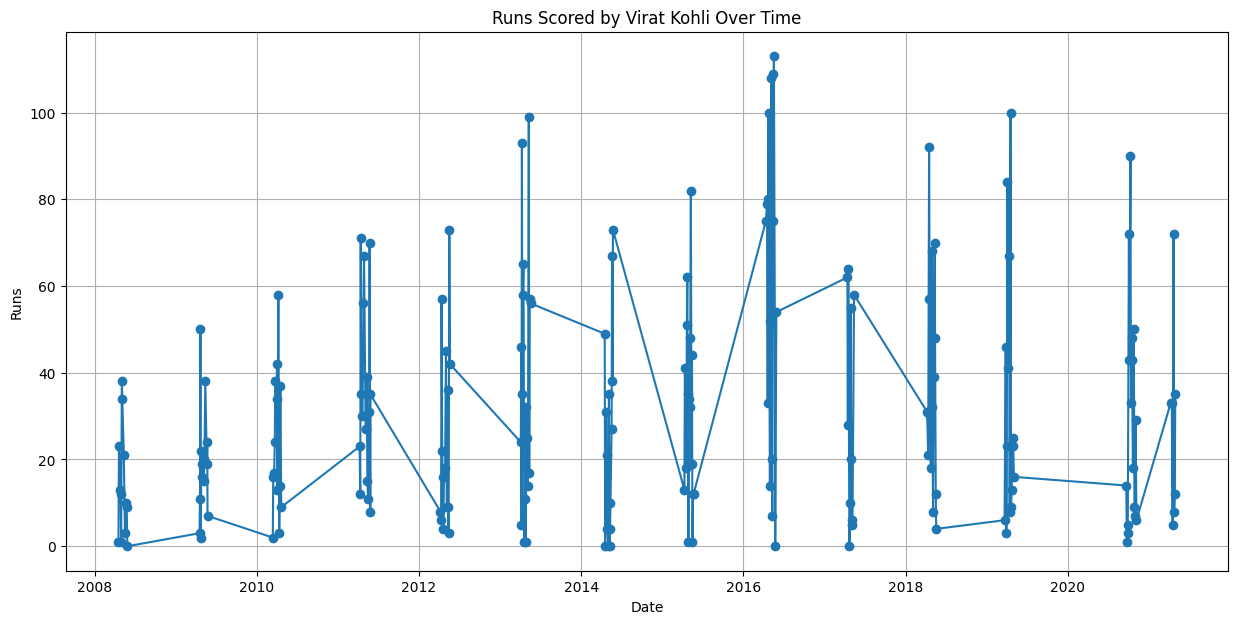

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

#Converting 'start_date' column to datetime if it's not already in datetime format
kohli_batting_stats['start_date'] = pd.to_datetime(kohli_batting_stats['start_date'])

#Plotting the data
plt.figure(figsize=(15, 7))
plt.plot(kohli_batting_stats['start_date'], kohli_batting_stats['runs_off_bat'], marker='o', linestyle='-')
plt.title('Runs Scored by Virat Kohli Over Time')
plt.xlabel('Date')
plt.ylabel('Runs')
plt.grid(True)
plt.show()

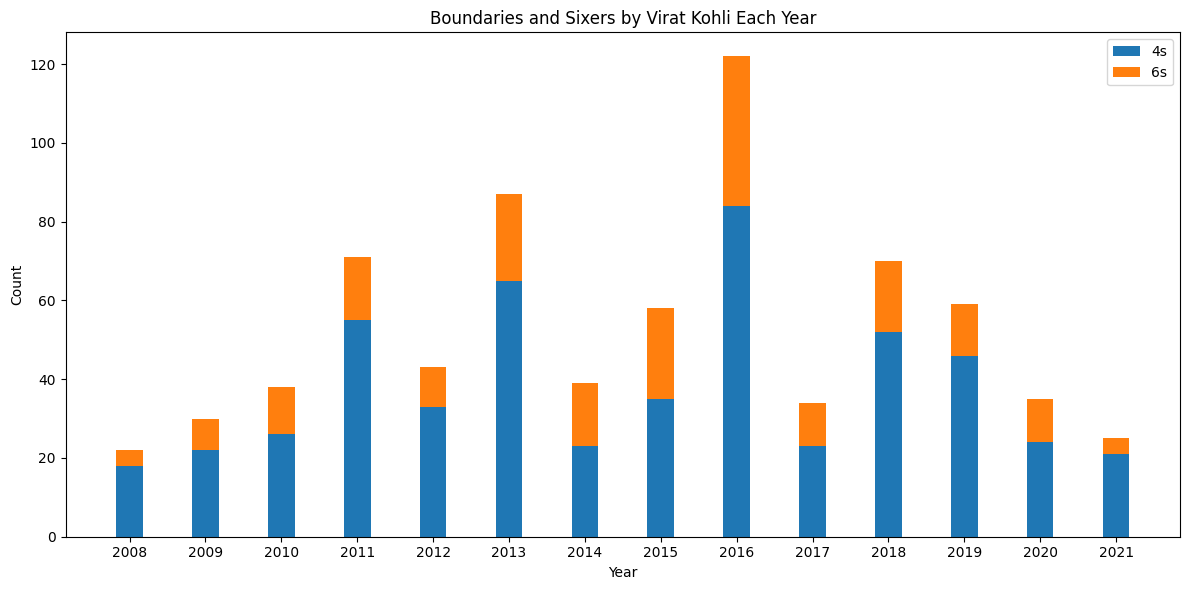

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#converting it to datetime
kohli_batting_stats['start_date'] = pd.to_datetime(kohli_batting_stats['start_date'])

#Extracting the year from the 'start_date' column
kohli_batting_stats['year'] = kohli_batting_stats['start_date'].dt.year

#Grouping data by year and calculating the total boundaries and sixes for each year
yearly_stats = kohli_batting_stats.groupby('year').agg({'boundary_count': 'sum', 'sixer_count': 'sum'}).reset_index()

#Plotting the data
plt.figure(figsize=(12, 6))
bar_width = 0.35
plt.bar(yearly_stats['year'], yearly_stats['boundary_count'], bar_width, label='4s')
plt.bar(yearly_stats['year'], yearly_stats['sixer_count'], bar_width, bottom=yearly_stats['boundary_count'], label='6s')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Boundaries and Sixers by Virat Kohli Each Year')
plt.xticks(yearly_stats['year']) 
plt.legend()
plt.tight_layout()
plt.show()

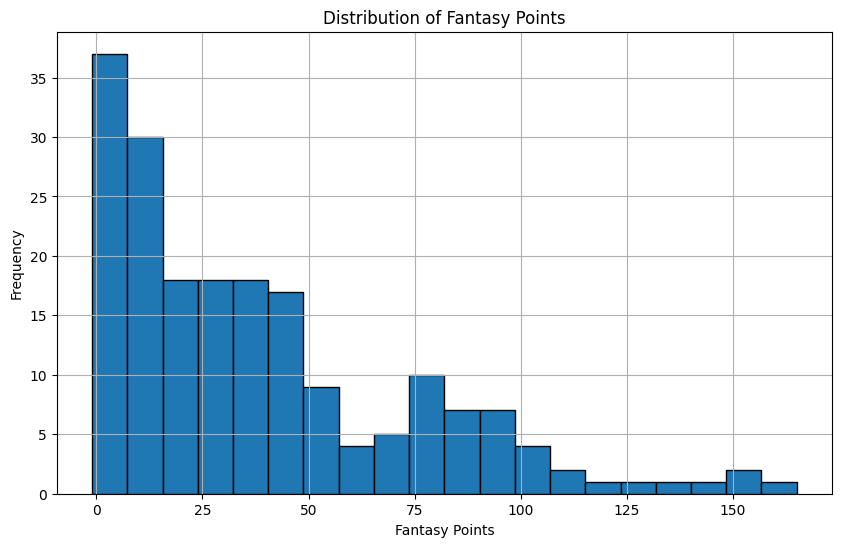

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(kohli_batting_stats['fantasy_points'], bins=20, edgecolor='black')
plt.title('Distribution of Fantasy Points')
plt.xlabel('Fantasy Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
#importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [14]:
#disaplaying the unique venues
unique_venues = kohli_batting_stats['venue'].unique()
unique_venues

array(['M Chinnaswamy Stadium', 'Wankhede Stadium', 'Feroz Shah Kotla',
       'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Rajiv Gandhi International Stadium, Uppal', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park',
       'New Wanderers Stadium', 'Eden Gardens', 'Brabourne Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Dr DY Patil Sports Academy', 'Nehru Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium', 'JSCA International Stadium Complex',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Sheikh Zayed Stadium', 'Sardar Patel Stadium, Motera',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Shaheed Veer Narayan Singh International Stadium',
       'M.Chinnaswa

In [15]:
#Transforming the venue column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
kohli_batting_stats['venue_encoded'] = label_encoder.fit_transform(kohli_batting_stats['venue'])
kohli_batting_stats['venue_encoded']

0      10
1      35
2      10
3      10
4       5
       ..
188    14
189    36
190    36
191    16
192    16
Name: venue_encoded, Length: 193, dtype: int32

In [16]:
kohli_batting_stats

,start_date,match_id,venue,innings,bowling_team,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points,year,venue_encoded
0,2008-04-18,335982,M Chinnaswamy Stadium,2,Kolkata Knight Riders,5,1,0,0,0,0,20.000000,1,2008,10
1,2008-04-20,335985,Wankhede Stadium,2,Mumbai Indians,15,23,3,1,0,0,153.333333,28,2008,35
2,2008-04-26,335992,M Chinnaswamy Stadium,1,Rajasthan Royals,16,13,0,1,0,0,81.250000,15,2008,10
3,2008-04-28,335996,M Chinnaswamy Stadium,2,Chennai Super Kings,7,12,2,0,0,0,171.428571,14,2008,10
4,2008-04-30,335998,Feroz Shah Kotla,2,Delhi Daredevils,1,1,0,0,0,0,100.000000,1,2008,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2021-04-18,1254067,"MA Chidambaram Stadium, Chepauk, Chennai",1,Kolkata Knight Riders,6,5,1,0,0,0,83.333333,6,2021,14
189,2021-04-22,1254073,"Wankhede Stadium, Mumbai",2,Rajasthan Royals,47,72,6,3,1,0,153.191489,92,2021,36
190,2021-04-25,1254076,"Wankhede Stadium, Mumbai",2,Chennai Super Kings,8,8,1,0,0,0,100.000000,9,2021,36
191,2021-04-27,1254079,"Narendra Modi Stadium, Ahmedabad",1,Delhi Capitals,12,12,2,0,0,0,100.000000,14,2021,16


In [17]:
#Transforming the bowling team column
label_encoder = LabelEncoder()
kohli_batting_stats['bowling_team'] = label_encoder.fit_transform(kohli_batting_stats['bowling_team'])
unique_venues = kohli_batting_stats['bowling_team'].unique()
unique_venues

array([ 7,  8, 11,  0,  3,  1,  5,  6,  9, 14, 13,  4, 12,  2, 10])

In [18]:
kohli_batting_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_date          193 non-null    datetime64[ns]
 1   match_id            193 non-null    int64         
 2   venue               193 non-null    object        
 3   innings             193 non-null    int64         
 4   bowling_team        193 non-null    int32         
 5   ball                193 non-null    int64         
 6   runs_off_bat        193 non-null    int64         
 7   boundary_count      193 non-null    int64         
 8   sixer_count         193 non-null    int64         
 9   half_century_count  193 non-null    int32         
 10  century_count       193 non-null    int32         
 11  strike_rate         193 non-null    float64       
 12  fantasy_points      193 non-null    int64         
 13  year                193 non-null    int32         

In [19]:
kohli_batting_stats

,start_date,match_id,venue,innings,bowling_team,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points,year,venue_encoded
0,2008-04-18,335982,M Chinnaswamy Stadium,2,7,5,1,0,0,0,0,20.000000,1,2008,10
1,2008-04-20,335985,Wankhede Stadium,2,8,15,23,3,1,0,0,153.333333,28,2008,35
2,2008-04-26,335992,M Chinnaswamy Stadium,1,11,16,13,0,1,0,0,81.250000,15,2008,10
3,2008-04-28,335996,M Chinnaswamy Stadium,2,0,7,12,2,0,0,0,171.428571,14,2008,10
4,2008-04-30,335998,Feroz Shah Kotla,2,3,1,1,0,0,0,0,100.000000,1,2008,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2021-04-18,1254067,"MA Chidambaram Stadium, Chepauk, Chennai",1,7,6,5,1,0,0,0,83.333333,6,2021,14
189,2021-04-22,1254073,"Wankhede Stadium, Mumbai",2,11,47,72,6,3,1,0,153.191489,92,2021,36
190,2021-04-25,1254076,"Wankhede Stadium, Mumbai",2,0,8,8,1,0,0,0,100.000000,9,2021,36
191,2021-04-27,1254079,"Narendra Modi Stadium, Ahmedabad",1,2,12,12,2,0,0,0,100.000000,14,2021,16


In [20]:
# Batting prediction using additional Variables 
# Data Preparation
features = ['ball','runs_off_bat' ,'boundary_count', 'sixer_count', 'strike_rate','half_century_count', 'century_count', 'venue_encoded', 'innings','bowling_team']
X = kohli_batting_stats[features]
y = kohli_batting_stats['fantasy_points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred_lr2 = lr2.predict(X_test)

# SVM with Linear Kernel
svm_linear2 = SVR(kernel='linear')
svm_linear2.fit(X_train, y_train)
y_pred_svm_linear2 = svm_linear2.predict(X_test)

# SVM with Polynomial Kernel
svm_poly2 = SVR(kernel='poly')
svm_poly2.fit(X_train, y_train)
y_pred_svm_poly2 = svm_poly2.predict(X_test)

# Evaluation
models = ['Linear Regression with additional variable', 'SVM Linear with Additional Variable', 'SVM Polynomial with Additional Variable']
predictions = [y_pred_lr2, y_pred_svm_linear2, y_pred_svm_poly2]

for i, model in enumerate(models):
    print(f"{model} Metrics:")
    print("MAE:", mean_absolute_error(y_test, predictions[i]))
    print("MSE:", mean_squared_error(y_test, predictions[i]))
    print("R2 Score:", r2_score(y_test, predictions[i]))
    print("-------------------------------")

Linear Regression with additional variable Metrics:
MAE: 0.45056798722984415
MSE: 0.8509748711712762
R2 Score: 0.9985600124836719
-------------------------------
SVM Linear with Additional Variable Metrics:
MAE: 0.3590916208709025
MSE: 0.962058274667292
R2 Score: 0.9983720413464215
-------------------------------
SVM Polynomial with Additional Variable Metrics:
MAE: 7.68319676974206
MSE: 88.5027489014237
R2 Score: 0.8502389930699611
-------------------------------


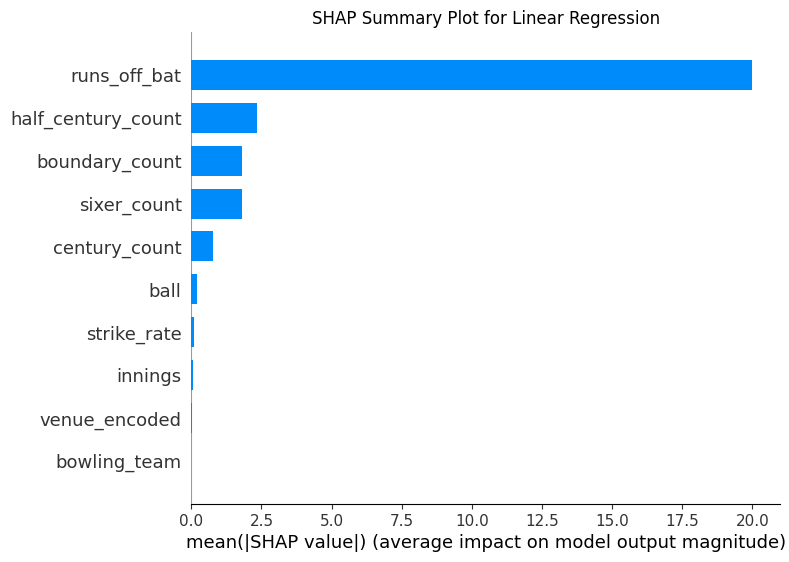

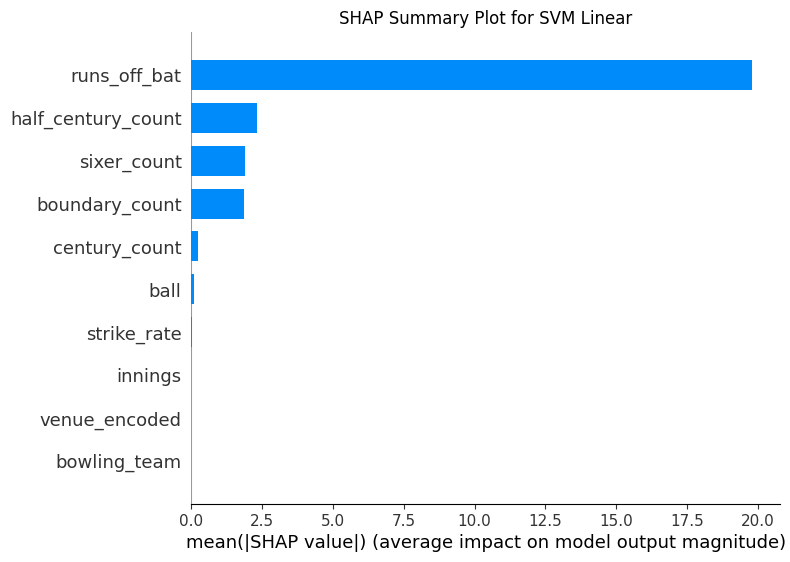

In [21]:
import shap

# List of models and corresponding names
models = [lr2, svm_linear2]
model_names = ['Linear Regression', 'SVM Linear']

# Initialize a SHAP explainer and calculate feature importance for each model
for i, model in enumerate(models):
    # Initialize a SHAP explainer for the model
    explainer = shap.Explainer(model, X_train)
    
    # Calculate SHAP values for the test data
    shap_values = explainer.shap_values(X_test)
    
    # Summary Plot of Feature Importance
    plt.figure(figsize=(8, 6))
    shap.summary_plot(shap_values, X_test, feature_names=features, plot_type='bar', show=False)
    plt.title(f"SHAP Summary Plot for {model_names[i]}")
    plt.show()


In [22]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count','innings']
target = 'fantasy_points'

X = kohli_batting_stats[features].values
y = kohli_batting_stats[target].values

#Calculating the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  #Creating input sequences of length 10
    y_train_val = y_train[i]      #Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Converting lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the LSTM input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(Dense(1))  #Output layer with one neuron for regression
#Compiling the model
model.compile(optimizer='adam', loss='mse')

#Training the model
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1)

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating empty lists to store sequences for testing data with window size 10
x_windows_test = []

#Creating rolling window sequences for testing data with window size 10
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Converting list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the LSTM input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
5/5 [==============================] - 3s 9ms/step - loss: 5069.7900
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 2498.5037
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 2011.1021
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 1558.4779
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 1416.9827
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 1365.0239
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 1296.2479
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 1169.5809
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 1193.4282
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 1077.6987
Epoch 11/50
5/5 [==============================] - 0s 7ms/step - loss: 1073.5267
Epoch 12/50
5/5 [==============================] - 0s 8ms/step - loss: 1007.5523
Epoch 13/50
5/5 [====================

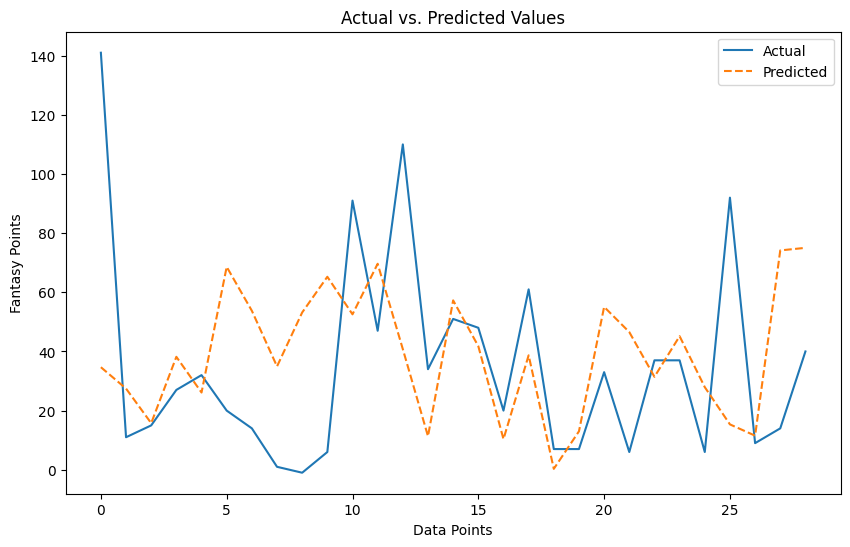

In [23]:
import matplotlib.pyplot as plt
#Plotting actual vs. predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count','innings']
target = 'fantasy_points'

X = kohli_batting_stats[features].values
y = kohli_batting_stats[target].values

#Calculating the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  # Creating input sequences of length 10
    y_train_val = y_train[i]      # Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Converting lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the LSTM input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the Bidirectional LSTM model with Dropout regularization
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True), input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mse')  # Compiling the model

#Training the model
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1)

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating empty lists to store sequences for testing data with window size 10
x_windows_test = []

#Creating rolling window sequences for testing data with window size 10
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Convert list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the LSTM input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
5/5 [==============================] - 10s 22ms/step - loss: 2623.3564
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 1873.3920
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 1631.3114
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 1597.7974
Epoch 5/50
5/5 [==============================] - 0s 18ms/step - loss: 1511.0795
Epoch 6/50
5/5 [==============================] - 0s 21ms/step - loss: 1277.2994
Epoch 7/50
5/5 [==============================] - 0s 21ms/step - loss: 1411.5779
Epoch 8/50
5/5 [==============================] - 0s 20ms/step - loss: 1181.1864
Epoch 9/50
5/5 [==============================] - 0s 18ms/step - loss: 1343.0061
Epoch 10/50
5/5 [==============================] - 0s 23ms/step - loss: 1284.7850
Epoch 11/50
5/5 [==============================] - 0s 22ms/step - loss: 1307.6177
Epoch 12/50
5/5 [==============================] - 0s 22ms/step - loss: 1323.1865
Epoch 13/50
5/5 [=======

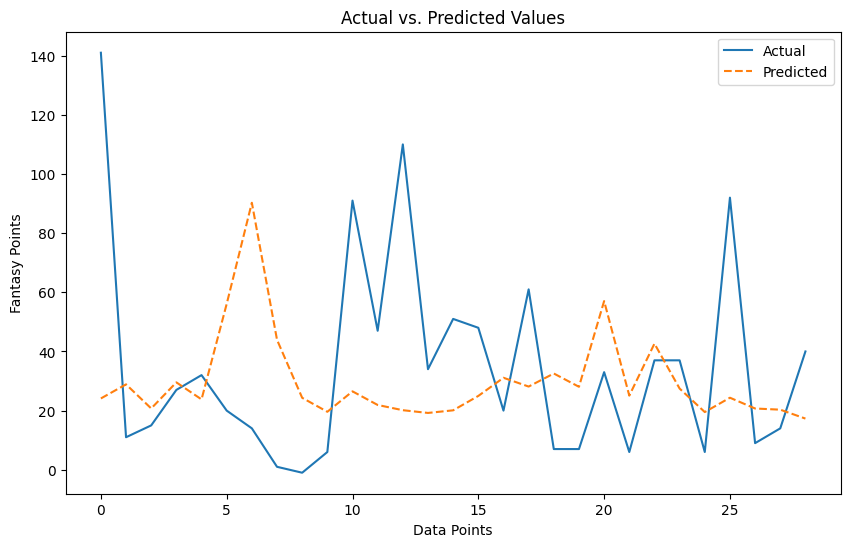

In [25]:
import matplotlib.pyplot as plt
#Plotting actual vs. predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count', 'innings']
target = 'fantasy_points'

X = kohli_batting_stats[features].values
y = kohli_batting_stats[target].values

#Calculating the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  #Creating input sequences of length 10
    y_train_val = y_train[i]      #Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Converting lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the CNN input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the CNN model with Dropout regularization
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mse')  # Compiling the model

#Training the model
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1)

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating empty lists to store sequences for testing data with window size 10
x_windows_test = []

#Creating rolling window sequences for testing data with window size 10
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Convert list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the CNN input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 1523.2476
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 1386.9565
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 1337.8303
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 1254.9374
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 1224.7332
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 1273.3936
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 1234.4941
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 1288.0795
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 1210.7408
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 1173.8861
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 1129.6558
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: 1075.7456
Epoch 13/50
5/5 [====================

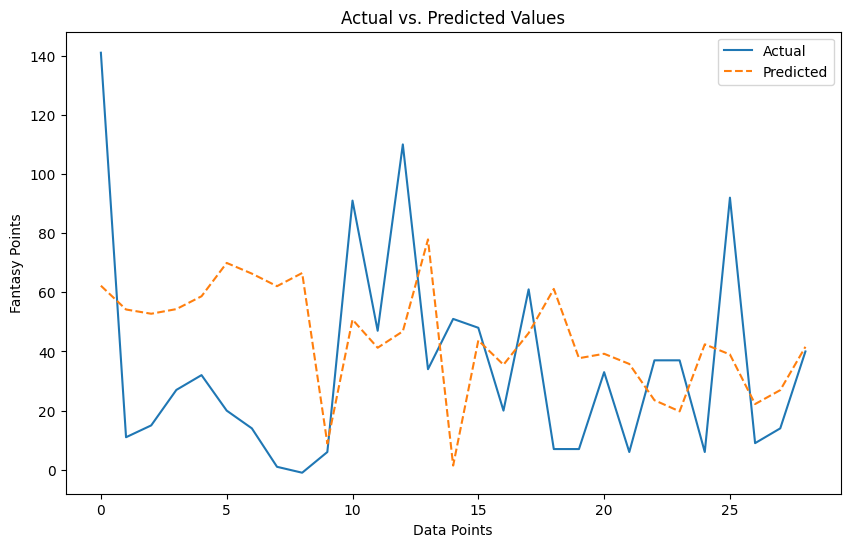

In [27]:
import matplotlib.pyplot as plt
#Plotting actual vs. predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

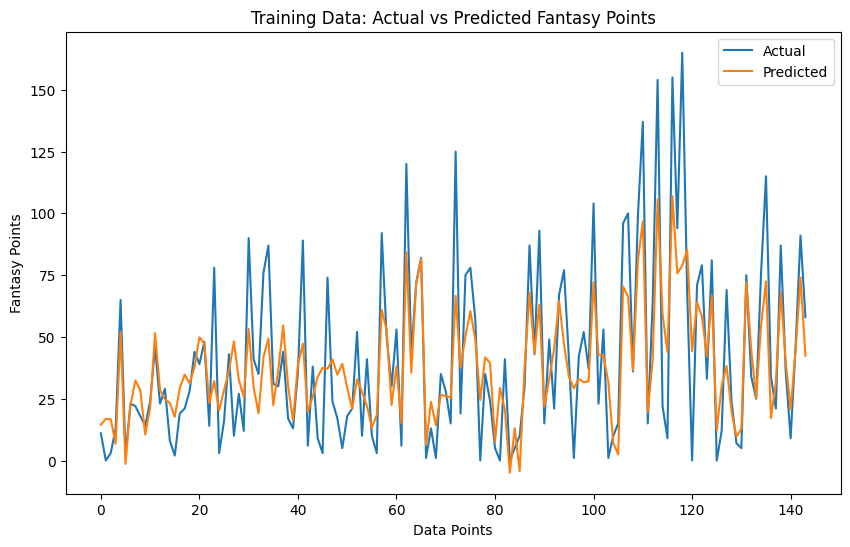

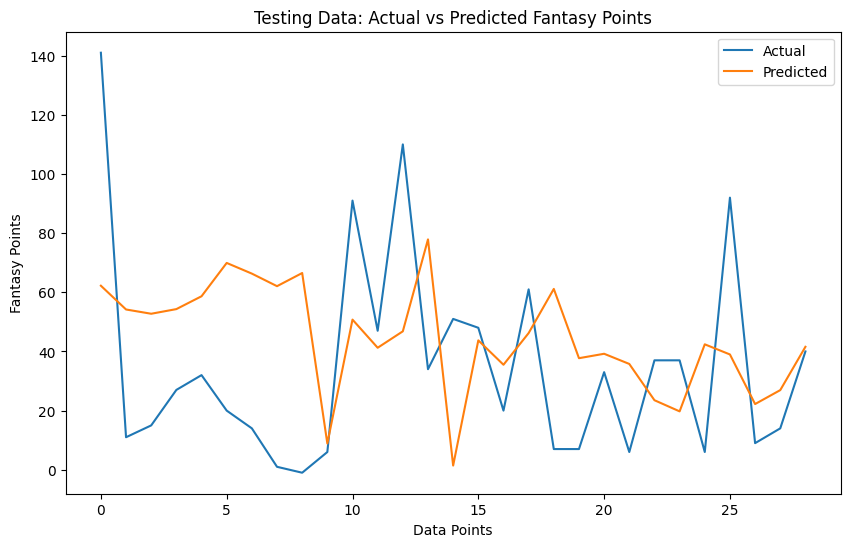

In [28]:
import matplotlib.pyplot as plt

# Plotting training predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_train[10:], label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('Training Data: Actual vs Predicted Fantasy Points')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

# Plotting testing predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('Testing Data: Actual vs Predicted Fantasy Points')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Assuming your data is loaded into 'kohli_batting_stats'

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count', 'innings']
target = 'fantasy_points'

X = kohli_batting_stats[features].values
y = kohli_batting_stats[target].values

#Calculate the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  # Creating input sequences of length 10
    y_train_val = y_train[i]      # Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Convert lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the RNN input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mse')  # Compiling the model

#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Training the model with early stopping
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating rolling window sequences for testing data with window size 10
x_windows_test = []
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Convert list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the RNN input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
4/4 [==============================] - 3s 187ms/step - loss: 2384.0347 - val_loss: 3767.0388
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 1902.8418 - val_loss: 3288.4370
Epoch 3/50
4/4 [==============================] - 0s 24ms/step - loss: 1738.4861 - val_loss: 2888.7314
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: 1465.1904 - val_loss: 2607.0337
Epoch 5/50
4/4 [==============================] - 0s 22ms/step - loss: 1370.9781 - val_loss: 2362.1719
Epoch 6/50
4/4 [==============================] - 0s 26ms/step - loss: 1210.3184 - val_loss: 2182.2869
Epoch 7/50
4/4 [==============================] - 0s 22ms/step - loss: 1195.7545 - val_loss: 2070.4282
Epoch 8/50
4/4 [==============================] - 0s 23ms/step - loss: 1087.1111 - val_loss: 2008.7312
Epoch 9/50
4/4 [==============================] - 0s 23ms/step - loss: 1191.2311 - val_loss: 1980.0251
Epoch 10/50
4/4 [==============================] - 0s 21ms/step - loss: 